# Noise Hamming weight and Pearson Correlation

This notebook demonstrates how to guess a floating number using Hamming Weight model.

We generate a random secret floating number. Then we use hamming weight model to guess the number.

In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
from guess_range import *
from batina_guess_number import *

## Visualize HW Behavior

In [2]:
def compute_corr(secret_hw, guess_range, known_inputs, guess_val_size=1000):
    low, high = guess_range
    guess_val = np.arange(low, high, (high - low) / (guess_val_size - 1e-127))
    hw = pd.DataFrame(columns=guess_val,
                        data=np.vectorize(hamming_weight)(known_inputs.reshape(-1, 1) * guess_val))
    return hw.corrwith(pd.Series(secret_hw), method='pearson')

In [15]:
guess_range=(0, 5e0)
# the number of guess values in the guess range
guess_val_size=1000
# generate the known inputs which is used to test the guess values
input_range = 2
known_inputs = np.random.uniform(-10 ** input_range, 10 ** input_range, 1000)

secret_number = np.random.uniform(guess_range[0], guess_range[1]) 
secret_number = 1.90826472023605
print('secret_number =', secret_number)

secret_number = 1.90826472023605


In [16]:
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
correlations = compute_corr(secret_hw, guess_range, known_inputs, guess_val_size)
correlations_1 = compute_corr(secret_hw, guess_range, known_inputs, int(guess_val_size*10))
correlations_2 = compute_corr(secret_hw, guess_range, known_inputs, int(guess_val_size/10))
correlations.sort_values(ascending=False).iloc[:10]

1.910    0.374028
3.815    0.349194
1.905    0.320902
3.820    0.314890
1.915    0.311885
0.955    0.302155
3.825    0.282775
1.900    0.264759
3.810    0.262266
0.000    0.261782
dtype: float64

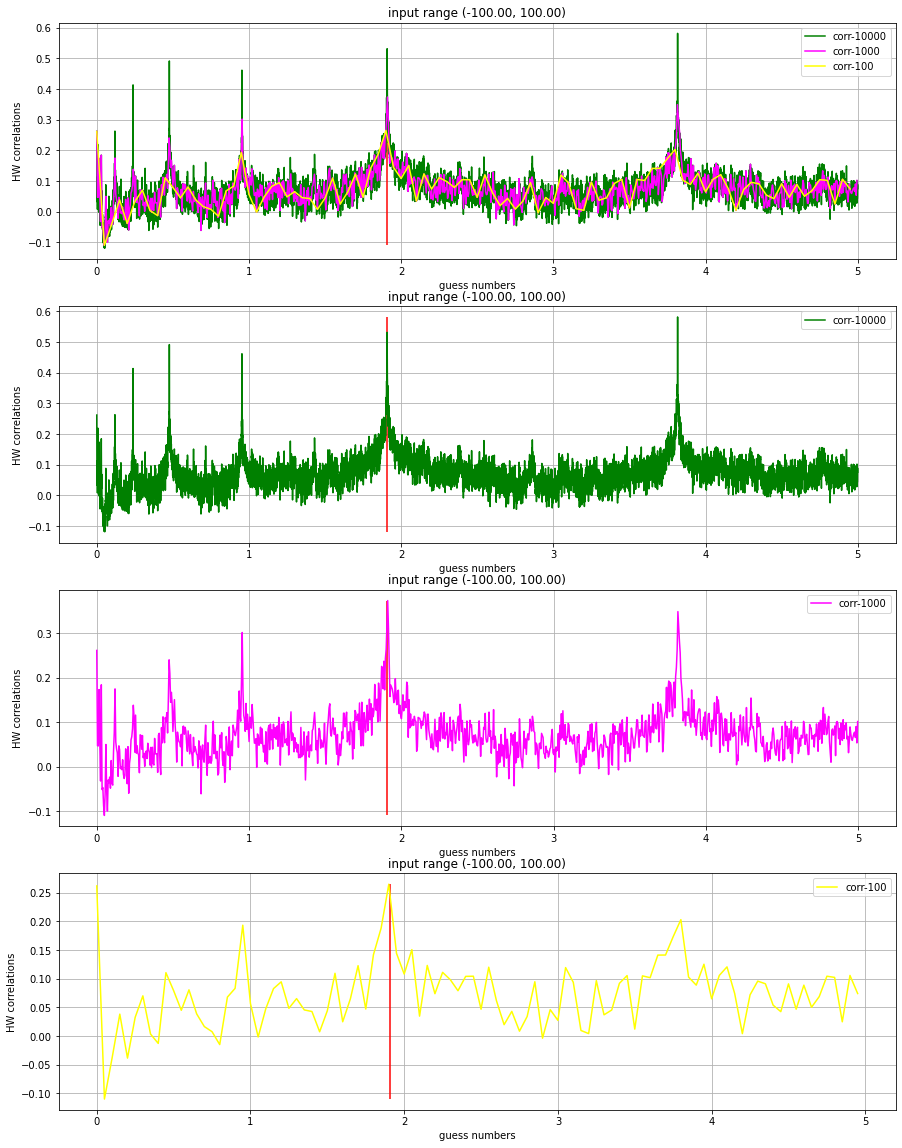

In [17]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))
correlations_1.plot(ax=ax[0], label='corr-%s' % correlations_1.shape[0], color='green')
correlations.plot(ax=ax[0], label='corr-%s' % correlations.shape[0], color='magenta')
correlations_2.plot(ax=ax[0], label='corr-%s' % correlations_2.shape[0], color='yellow')
ax[0].vlines(secret_number, correlations.min(), correlations.max(), color='red')

correlations_1.plot(ax=ax[1], label='corr-%s' % correlations_1.shape[0], color='green')
ax[1].vlines(secret_number, correlations_1.min(), correlations_1.max(), color='red')

correlations.plot(ax=ax[2], label='corr-%s' % correlations.shape[0], color='magenta')
ax[2].vlines(secret_number, correlations.min(), correlations.max(), color='red')

correlations_2.plot(ax=ax[3], label='corr-%s' % correlations_2.shape[0], color='yellow')
ax[3].vlines(secret_number, correlations_2.min(), correlations_2.max(), color='red')

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('guess numbers')
    a.set_ylabel('HW correlations')
    a.set_title('input range (%.02f, %.02f)' % (-10 ** input_range, 10 ** input_range))
    
plt.show()

## Correlation of mantissa

In [29]:
guess_numbers = build_guess_values(value_type='mantissa', mantissa_nbits=12, guess_range=guess_range)
mantisa_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

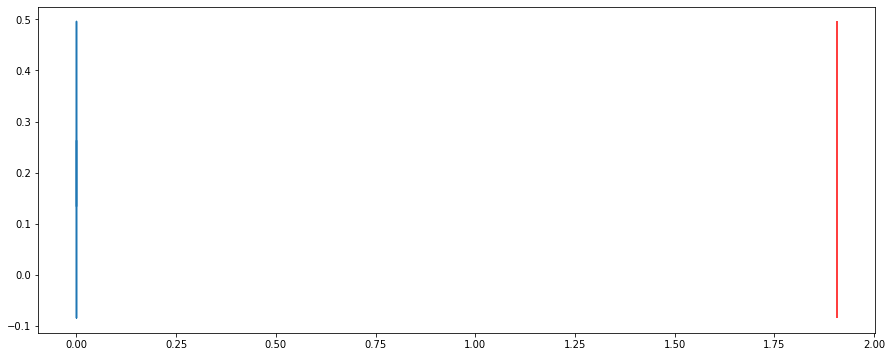

In [30]:
ax = mantisa_corr.sort_index().plot(figsize=(15,6))
ax.vlines(secret_number, mantisa_corr.min(), mantisa_corr.max(), color='red')

In [31]:
mantisa_corr.sort_values(ascending=False).iloc[:10]

5.607705e-39    0.495834
1.121541e-38    0.458273
2.803852e-39    0.442996
5.610575e-39    0.381182
1.121254e-38    0.363716
5.604835e-39    0.345048
5.599095e-39    0.342871
1.121828e-38    0.342478
1.122115e-38    0.341642
1.400491e-39    0.339693
dtype: float64

## Correlation exponent

In [32]:
guess_numbers = build_guess_values(value_type='exponent', numbers=mantisa_corr.sort_values(ascending=False).index[:10], guess_range=guess_range)
mantisa_exp_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/home/tvk/programming/others/DPACv4/batina_guess_number.py:28: RuntimeWarning: invalid value encountered in less_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]


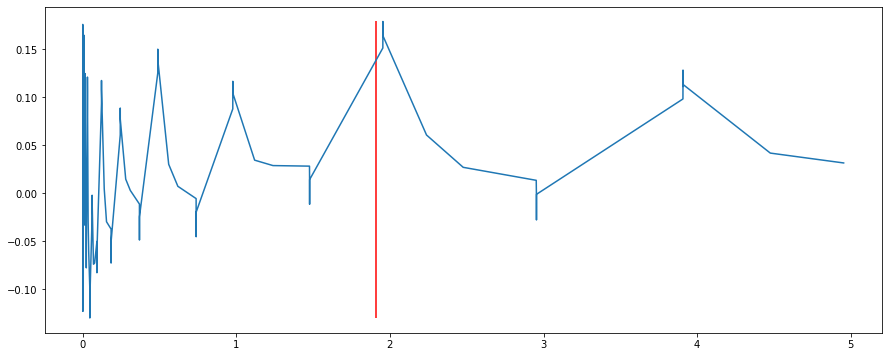

In [33]:
ax = mantisa_exp_corr.sort_index().plot(figsize=(15,6))
ax.vlines(secret_number, mantisa_exp_corr.min(), mantisa_exp_corr.max(), color='red')

In [34]:
mantisa_exp_corr.sort_values(ascending=False).iloc[:10]

1.954102e+00    0.179030
1.059321e-19    0.175946
4.549747e-10    0.172528
2.466423e-29    0.172528
2.981722e-05    0.168779
1.616395e-24    0.168779
3.763463e-34    0.168779
6.942363e-15    0.168779
1.164735e-07    0.164709
7.633209e-03    0.164709
dtype: float64

## Correlation sign

In [35]:
guess_numbers = build_guess_values(value_type='sign', numbers=mantisa_exp_corr.sort_values(ascending=False).index[:10], guess_range=guess_range)
full_number_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

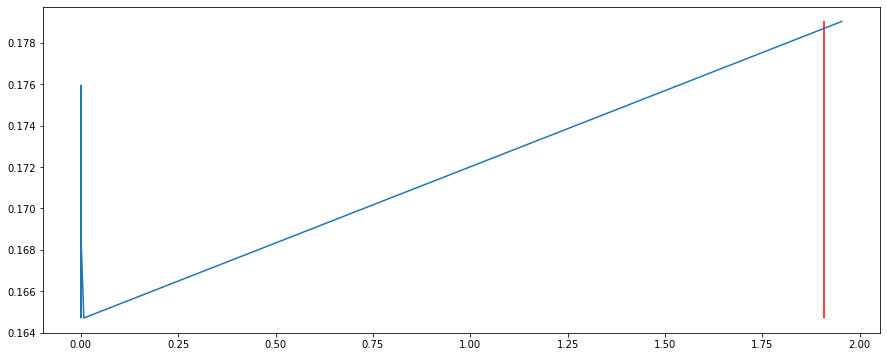

In [36]:
ax = full_number_corr.sort_index().plot(figsize=(15,6))
ax.vlines(secret_number, full_number_corr.min(), full_number_corr.max(), color='red')

In [37]:
full_number_corr.sort_values(ascending=False).iloc[:10]

1.954102e+00    0.179030
1.059321e-19    0.175946
2.466423e-29    0.172528
4.549747e-10    0.172528
2.981722e-05    0.168779
6.942363e-15    0.168779
3.763463e-34    0.168779
1.616395e-24    0.168779
7.633209e-03    0.164709
1.164735e-07    0.164709
dtype: float64

## Recover a secret number

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/home/tvk/programming/others/DPACv4/batina_guess_number.py:28: RuntimeWarning: invalid value encountered in less_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]


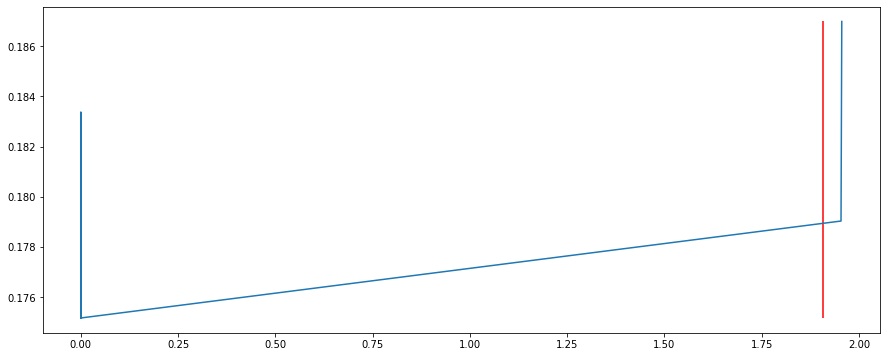

In [27]:
full_number_corr = batina_recover_weight(weight_hw=secret_hw, known_inputs=known_inputs, guess_range=guess_range)
ax = full_number_corr.sort_index().plot(figsize=(15,6))
ax.vlines(secret_number, full_number_corr.min(), full_number_corr.max(), color='red')

In [28]:
full_number_corr.sort_values(ascending=False).iloc[:10]

1.956055e+00    0.186985
1.060379e-19    0.183376
4.554295e-10    0.179432
2.468888e-29    0.179432
1.954102e+00    0.179030
1.059321e-19    0.175946
2.984703e-05    0.175166
6.949302e-15    0.175166
1.618011e-24    0.175166
3.767224e-34    0.175166
dtype: float64

## Analyze with noise - one number

In [104]:
def resize_known_inputs(known_inputs, new_len):
    """
    resize the known input to the new_len
    :param known_inputs: known inputs 
    :param new_len: new size of the know_inputs
    :return: the known
    """
    old_len = len(known_inputs)
    vf = np.vectorize(lambda i: known_inputs[int(i*old_len/new_len)])
    return vf(np.arange(0, new_len))

In [105]:
def add_noise_to_signal(signal, snr, freq):
    """
    add noise to the signal
    :param signal: signal
    :param snr: signal to noise ratio 
    :param freq: frequency of noise 
    :return: signal with noise
    """
    sig_max = signal.max()
    sig_min = signal.min()
    return pd.Series(signal).apply(lambda x: x  +
                                   np.average(np.random.normal(0.0, (sig_max-sig_min)/snr, freq)))

In [106]:
# the noise frequency is 50 times higher than HW signal frequency. Here we also increase
# the sizes of the computation with 
no_noise_secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)

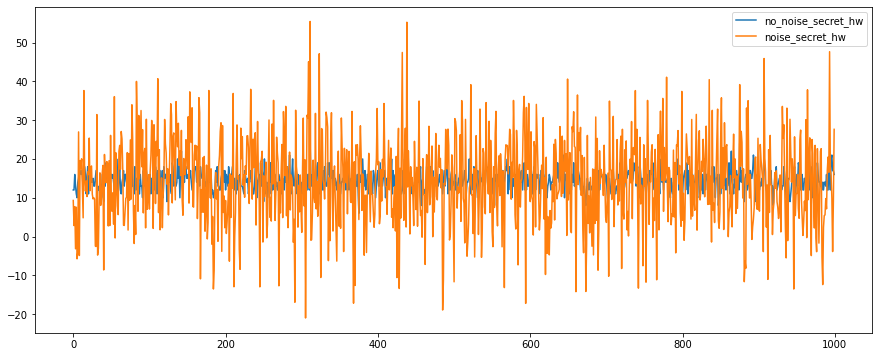

In [20]:
### Add noise to hamming weight of the multiplication of the secret number
signal_to_noise_ratio = 0.5
noise_secret_hw = add_noise_to_signal(signal=no_noise_secret_hw, snr=signal_to_noise_ratio, freq=10)
ax = pd.DataFrame([no_noise_secret_hw, noise_secret_hw], index=['no_noise_secret_hw', 'noise_secret_hw']).T.plot(figsize=(15,6))
ax.legend()

In [21]:
noise_correlations = compute_corr(noise_secret_hw, guess_range, known_inputs, guess_val_size)
print('secret_number =', secret_number)
noise_correlations.sort_values(ascending=False).iloc[:10]

secret_number = 0.8890826472023605


0.835    0.116683
0.795    0.097666
0.915    0.092389
3.340    0.085436
0.050    0.085414
0.860    0.085013
0.725    0.083342
0.215    0.080588
3.310    0.078285
3.290    0.076983
dtype: float64

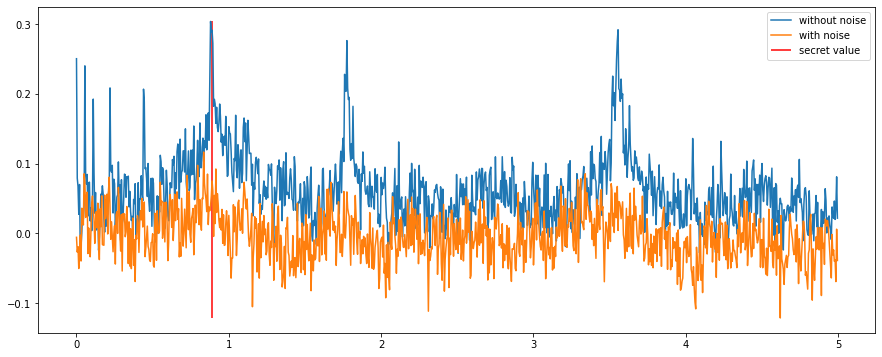

In [22]:
ax = correlations.plot(figsize=(15, 6), label='without noise')
noise_correlations.plot(ax=ax, label='with noise')
ax.vlines(secret_number, 
          min(noise_correlations.min(), correlations.min()),
          max(noise_correlations.max(), correlations.max()), 
          color='red', label='secret value')
ax.legend()

## Analyze with noise - multiple numbers

In [23]:
guess_range = (0.0, 5.0)
known_input_set = generate_known_inputs(exps=(-2,3), nsize=3000)
precision = 1e-6
n_secret_numbers = 10
secret_numbers = np.concatenate((
    np.random.uniform(guess_range[0], guess_range[1], int(n_secret_numbers*2/4) ),
    np.random.uniform(guess_range[0]*3e-1, guess_range[1]*3e-1, int(n_secret_numbers*1/4)),
    np.random.uniform(guess_range[0]*1e-1, guess_range[1]*1e-1, int(n_secret_numbers*1/4))
))
np.random.shuffle(secret_numbers)
print('secret_numbers.shape = %s' % (str(secret_numbers.shape)))

secret_numbers.shape = (9,)


In [24]:
secret_numbers_hws = {}
for idx in known_input_set.index:
    secret_numbers_hws[idx] = pd.DataFrame(
        columns=secret_numbers, 
        data=np.vectorize(hamming_weight)(np.asarray(known_input_set.loc[idx]).reshape(-1, 1) * secret_numbers))

In [25]:
secret_numbers_hws[0]

,4.383929,0.085937,0.365908,0.734093,1.879252,0.578602,3.272018,0.920624,0.578828
0,10,17,20,18,19,17,27,17,18
1,12,20,16,17,21,11,11,17,15
2,13,20,16,15,20,21,12,21,18
3,22,19,16,17,18,15,18,19,17
4,15,17,18,21,18,15,15,16,21
...,...,...,...,...,...,...,...,...,...
495,9,21,19,16,19,19,11,17,18
496,19,17,18,16,22,15,19,15,16
497,13,17,16,14,18,20,15,16,15
498,13,22,15,18,22,19,12,17,18


In [26]:
SECRET_VALUE='secret value'
df_index = [INPUT_ID, LOW_VALUE, HIGH_VALUE, CORRELATION, SECRET_VALUE]

In [27]:
%%time
# start guessing... - without noise first
results = pd.DataFrame()
for value in secret_numbers:
    for kidx in known_input_set.index:
        l, h, c = guess_number_range(secret_numbers_hws[kidx][value], guess_range, precision, known_input_set.loc[kidx])
        pprint('[%.06f] %02d %.06f %.06f %.06f' % (value, kidx, l, h, c))
        results = pd.concat([results, pd.Series([kidx, l, h, c, value], index=df_index)], axis=1, ignore_index=True)

'[4.383929] -2 4.383929 4.383929 0.999478'
'[4.383929] -1 4.383929 4.383929 1.000000'
'[4.383929] 00 4.383929 4.383929 1.000000'
'[4.383929] 01 4.383929 4.383929 0.999862'
'[4.383929] 02 4.383929 4.383929 0.999856'
'[4.383929] 03 4.383929 4.383929 1.000000'
'[0.085937] -2 1.374984 1.374984 0.972940'
'[0.085937] -1 1.374984 1.374984 0.992044'
'[0.085937] 00 1.374984 1.374984 0.992621'
'[0.085937] 01 2.749968 2.749969 0.821814'
'[0.085937] 02 0.085936 0.085937 0.984631'
'[0.085937] 03 1.374984 1.374984 0.971628'
'[0.365908] -2 0.365908 0.365908 0.997705'
'[0.365908] -1 0.365908 0.365908 0.998661'
'[0.365908] 00 1.463630 1.463631 0.977251'
'[0.365908] 01 0.365908 0.365908 0.999613'
'[0.365908] 02 0.365908 0.365908 0.998427'
'[0.365908] 03 1.463630 1.463631 0.936085'
'[0.734093] -2 2.936370 2.936370 0.941696'
'[0.734093] -1 2.936370 2.936370 0.969224'
'[0.734093] 00 2.936370 2.936370 0.711383'
'[0.734093] 01 0.734092 0.734093 0.998657'
'[0.734093] 02 2.936370 2.936370 0.930037'
'[0.734093]

In [28]:
### Add noise to hamming weight of the multiplication of the secret number
signal_to_noise_ratio = 0.5
noise_secret_numbers_hws = {}
for k in secret_numbers_hws.keys():
    noise_secret_numbers_hws[k] = secret_numbers_hws[k].apply(lambda hw: add_noise_to_signal(signal=hw, snr=signal_to_noise_ratio, freq=200), axis=0)
noise_secret_numbers_hws[0]    

,4.383929,0.085937,0.365908,0.734093,1.879252,0.578602,3.272018,0.920624,0.578828
0,7.635489,17.914147,20.961374,17.639122,18.490245,17.183740,28.076282,17.408913,18.108349
1,12.365080,22.502027,15.533517,15.329899,21.683060,8.056250,12.530604,18.154163,11.894016
2,13.158793,16.395518,22.987855,15.818697,22.365658,19.701089,10.508733,20.337985,15.085868
3,22.330038,16.190893,12.852989,16.546916,18.426041,19.745167,19.092477,16.102693,20.861352
4,14.343278,15.638357,20.952463,25.157366,17.685517,17.140133,16.011429,19.244872,24.617881
...,...,...,...,...,...,...,...,...,...
495,11.153715,20.886882,18.589527,16.646258,18.810822,22.454775,13.024545,21.227372,18.814819
496,18.240395,20.407815,16.030985,11.103414,21.141461,14.340405,23.589178,15.361083,17.515811
497,14.319455,15.856090,17.813207,17.110682,15.505768,22.640505,12.384327,16.928077,16.494724
498,10.578621,19.600480,12.452796,18.188989,22.675758,18.345956,11.155311,19.926971,19.778726


In [29]:
%%time
# start guessing... - with noise
noise_results = pd.DataFrame()
for value in secret_numbers:
    for kidx in known_input_set.index:
        l, h, c = guess_number_range(noise_secret_numbers_hws[kidx][value], guess_range, precision, known_input_set.loc[kidx])
        pprint('[%.06f] %02d %.06f %.06f %.06f' % (value, kidx, l, h, c))
        noise_results = pd.concat([noise_results, pd.Series([kidx, l, h, c, value], index=df_index)], axis=1, ignore_index=True)

'[4.383929] -2 4.383929 4.383929 0.763228'
'[4.383929] -1 4.383929 4.383929 0.770291'
'[4.383929] 00 4.383929 4.383929 0.828378'
'[4.383929] 01 4.383929 4.383929 0.766308'
'[4.383929] 02 4.383929 4.383929 0.749611'
'[4.383929] 03 4.383929 4.383929 0.745126'
'[0.085937] -2 1.374984 1.374984 0.763145'
'[0.085937] -1 1.374984 1.374984 0.725593'
'[0.085937] 00 1.374984 1.374984 0.743514'
'[0.085937] 01 1.374984 1.374984 0.556781'
'[0.085937] 02 1.374984 1.374984 0.650418'
'[0.085937] 03 1.374984 1.374984 0.760662'
'[0.365908] -2 1.463630 1.463631 0.754332'
'[0.365908] -1 1.463630 1.463631 0.774905'
'[0.365908] 00 1.463630 1.463631 0.714408'
'[0.365908] 01 0.365908 0.365908 0.803593'
'[0.365908] 02 0.365908 0.365908 0.784753'
'[0.365908] 03 1.463630 1.463631 0.680802'
'[0.734093] -2 2.936370 2.936371 0.675840'
'[0.734093] -1 2.936370 2.936371 0.770738'
'[0.734093] 00 2.936370 2.936370 0.570913'
'[0.734093] 01 0.734092 0.734093 0.797269'
'[0.734093] 02 2.936370 2.936371 0.753786'
'[0.734093]

In [30]:
%%time
# start guessing... - without noise
batina_results = pd.DataFrame(dtype=np.float32, columns=df_index)
for value in secret_numbers:
    for kidx in known_input_set.index:
        s = batina_recover_weight(weight_hw=secret_numbers_hws[kidx][value], guess_range=guess_range, known_inputs=known_input_set.loc[kidx])
        s.name = CORRELATION
        df = pd.DataFrame(s).reset_index().rename(columns={'index': LOW_VALUE})
        df[HIGH_VALUE] = df[LOW_VALUE]
        df[INPUT_ID] = kidx
        df[SECRET_VALUE] = value
        batina_results = pd.concat([batina_results, df], axis=0, ignore_index=True)

CPU times: user 56.8 s, sys: 776 ms, total: 57.6 s
Wall time: 57.6 s


In [31]:
%%time
# start guessing... - without noise
noise_batina_results = pd.DataFrame(dtype=np.float32, columns=df_index)
for value in secret_numbers:
    for kidx in known_input_set.index:
        s = batina_recover_weight(weight_hw=noise_secret_numbers_hws[kidx][value], guess_range=guess_range, known_inputs=known_input_set.loc[kidx])
        s.name = CORRELATION
        df = pd.DataFrame(s).reset_index().rename(columns={'index': LOW_VALUE})
        df[HIGH_VALUE] = df[LOW_VALUE]
        df[INPUT_ID] = kidx
        df[SECRET_VALUE] = value
        noise_batina_results = pd.concat([noise_batina_results, df], axis=0, ignore_index=True)

CPU times: user 56.9 s, sys: 780 ms, total: 57.7 s
Wall time: 57.7 s


### Statistics

In [32]:
GUESSED_VALUE = 'guessed value'
ERROR = 'error'
def statistics(df):
    dft = df.T
    dft[GUESSED_VALUE] = (dft[HIGH_VALUE]+dft[LOW_VALUE])/2.0
    dft[ERROR] = np.abs((dft[GUESSED_VALUE] - dft[SECRET_VALUE])/dft[SECRET_VALUE])
    best_corr = dft.loc[dft.groupby(SECRET_VALUE)[CORRELATION].idxmax()]
    best_err = dft.loc[dft.groupby(SECRET_VALUE)[ERROR].idxmin()]
    return best_corr.T, best_err.T

In [33]:
best_corr, best_err = statistics(results)
noise_best_corr, noise_best_err = statistics(noise_results)

In [34]:
batina_best_corr, batina_best_err = statistics(batina_results.T)
noise_batina_best_corr, noise_batina_best_err = statistics(noise_batina_results.T)

In [35]:
noise_best_corr

,6,15,35,51,21,47,24,41,2
input id,-2.000000,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,-2.000000e+00,3.000000e+00,0.000000e+00
low value,1.374984,3.659075e-01,5.786020e-01,5.788279e-01,7.340920e-01,9.206241e-01,1.879252e+00,3.272017e+00,4.383929e+00
high value,1.374984,3.659081e-01,5.786026e-01,5.788285e-01,7.340926e-01,9.206247e-01,1.879252e+00,3.272018e+00,4.383929e+00
correlation,0.763145,8.035932e-01,7.921350e-01,8.070671e-01,7.972692e-01,8.071924e-01,7.977174e-01,8.103699e-01,8.283785e-01
secret value,0.085937,3.659076e-01,5.786020e-01,5.788283e-01,7.340926e-01,9.206245e-01,1.879252e+00,3.272018e+00,4.383929e+00
guessed value,1.374984,3.659078e-01,5.786023e-01,5.788282e-01,7.340923e-01,9.206244e-01,1.879252e+00,3.272018e+00,4.383929e+00
error,15.000000,6.532190e-07,3.941881e-07,2.268274e-07,4.025178e-07,5.668645e-08,1.482250e-08,6.635570e-08,1.142465e-08


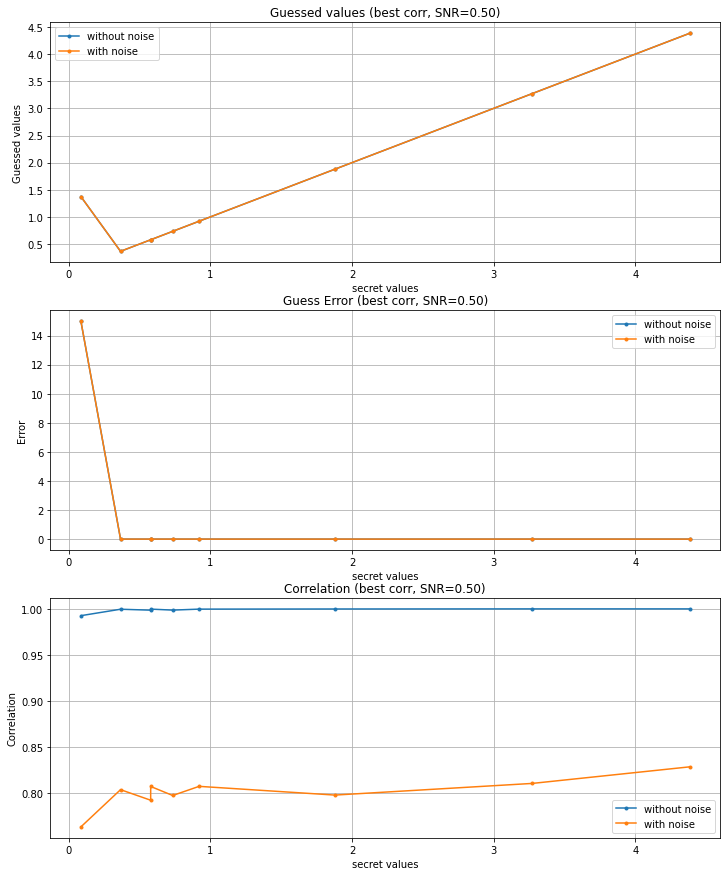

In [36]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
df = best_corr.T
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='without noise')
df = noise_best_corr.T
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='with noise')
ax[0].set_ylabel('Guessed values')
ax[0].set_title('Guessed values (best corr, SNR=%0.2f)' % signal_to_noise_ratio)

df = best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='without noise')
df = noise_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='with noise')
ax[1].set_ylabel('Error')
ax[1].set_title('Guess Error (best corr, SNR=%0.2f)' % signal_to_noise_ratio)

df = best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='without noise')
df = noise_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='with noise')
ax[2].set_ylabel('Correlation')
ax[2].set_title('Correlation (best corr, SNR=%0.2f)' % signal_to_noise_ratio)

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('secret values')

from datetime import datetime
fname = 'nhw-%s.jpg' % (datetime.now().strftime("%Y%m%d_%H%M%S%f"))
plt.savefig(fname)
plt.show()

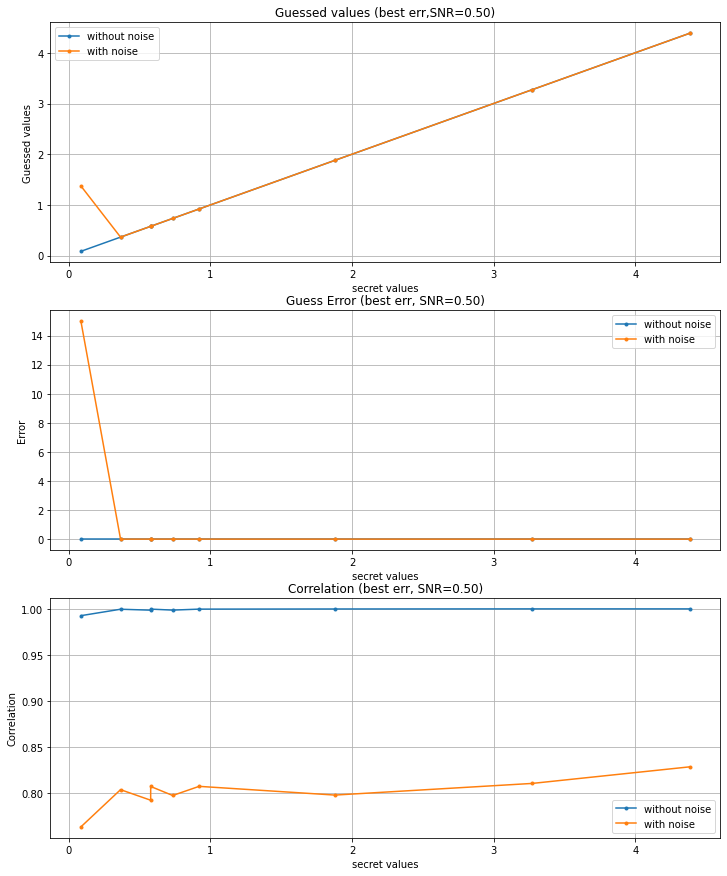

In [37]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
df = best_err.T
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='without noise')
df = noise_best_err.T
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='with noise')
ax[0].set_ylabel('Guessed values')
ax[0].set_title('Guessed values (best err,SNR=%0.2f)' % signal_to_noise_ratio)


df = best_err.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='without noise')
df = noise_best_err.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='with noise')
ax[1].set_ylabel('Error')
ax[1].set_title('Guess Error (best err, SNR=%0.2f)' % signal_to_noise_ratio)

df = best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='without noise')
df = noise_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='with noise')
ax[2].set_ylabel('Correlation')
ax[2].set_title('Correlation (best err, SNR=%0.2f)' % signal_to_noise_ratio)

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('secret values')

from datetime import datetime
fname = 'nhw-%s.jpg' % (datetime.now().strftime("%Y%m%d_%H%M%S%f"))
plt.savefig(fname)
plt.show()

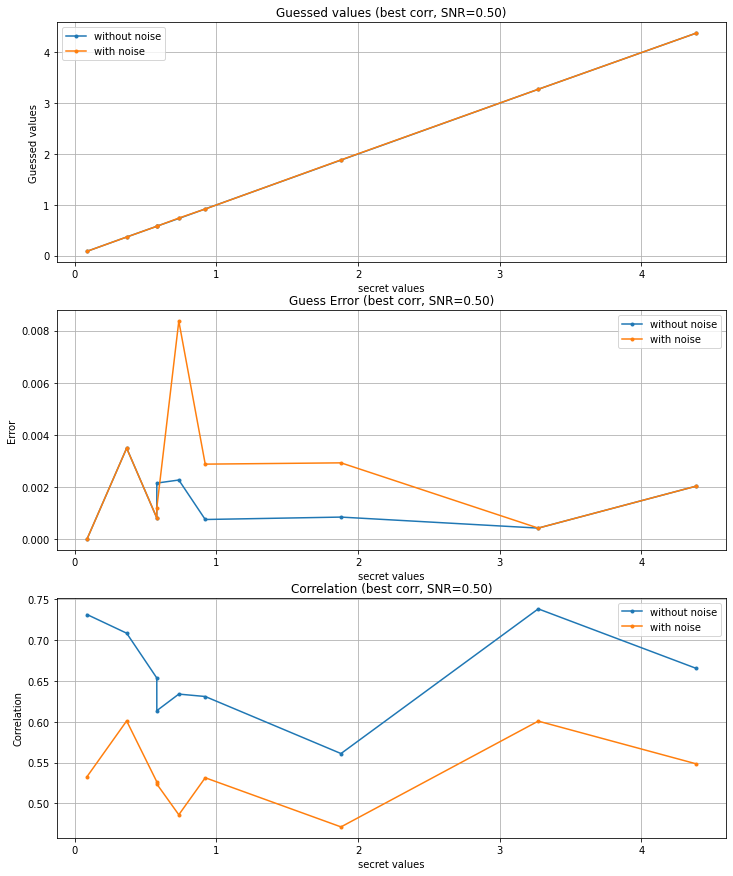

In [38]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
df = batina_best_corr.T
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='without noise')
df = noise_batina_best_corr.T
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='with noise')
ax[0].set_ylabel('Guessed values')
ax[0].set_title('Guessed values (best corr, SNR=%0.2f)' % signal_to_noise_ratio)

df = batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='without noise')
df = noise_batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='with noise')
ax[1].set_ylabel('Error')
ax[1].set_title('Guess Error (best corr, SNR=%0.2f)' % signal_to_noise_ratio)

df = batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='without noise')
df = noise_batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='with noise')
ax[2].set_ylabel('Correlation')
ax[2].set_title('Correlation (best corr, SNR=%0.2f)' % signal_to_noise_ratio)

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('secret values')

from datetime import datetime
fname = 'nhw-%s.jpg' % (datetime.now().strftime("%Y%m%d_%H%M%S%f"))
plt.savefig(fname)
plt.show()